# CRYPTO PRICE PREDICTION

# Data Preparation

In [1]:
# ############### PARAMETERS ############################## #
# TIMESPAN
crypto ="ADA"
p=-5

#p=-30

# FREQ

fr_bnb = '1h'
fr_ml = 'H'

#fr_bnb = '1m'
#fr_ml = 'min'

# LIMIT
## 3 days
#lm=48
lm=168
#lm=4320

In [2]:
import pandas as pd
import numpy as np
from pandas import read_csv
from datetime import datetime
from pandas import DataFrame
import matplotlib.pyplot as plt
import urllib.request
import time
import json
from fbprophet import Prophet

Load files

In [3]:

link = 'https://data.binance.vision/data/futures/um/monthly/klines/KAVAUSDT/15m/KAVAUSDT-15m-2021-05.zip'

In [4]:
def get_klines_iter(symbol, interval, limit=5000):
    df = pd.DataFrame()
    url = 'https://api.binance.com/api/v3/klines?symbol=' + \
            symbol + '&interval=' + interval + '&limit='  + str(limit)
        

    print(url)

    df2 = pd.read_json(url)
    df2.columns = ['Opentime', 'Open', 'High', 'Low', 'Close', 'Volume', 'Closetime', 'Quote asset volume', 'Number of trades','Taker by base', 'Taker buy quote', 'Ignore']
    df = pd.concat([df2, df], axis=0, ignore_index=True, keys=None)
       
    df.reset_index(drop=True, inplace=True)    
    return df 

In [5]:
df = get_klines_iter(crypto + 'USDT',fr_bnb, limit=lm)

https://api.binance.com/api/v3/klines?symbol=ADAUSDT&interval=1h&limit=168


In [6]:
def futures_klines(symbol, interval, limit=5000):
    df = pd.DataFrame()
    url = 'https://data.binance.vision/data/futures/um/monthly/klines/KAVAUSDT/15m/'+ symbol+'-15m'+ interval +'-2021-05.zip' + \
            symbol + '&interval=' + interval + '&limit='  + str(limit)
        

    print(url)

    df2 = pd.read_json(url)
    df2.columns = ['Opentime', 'Open', 'High', 'Low', 'Close', 'Volume', 'Closetime', 'Quote asset volume', 'Number of trades','Taker by base', 'Taker buy quote', 'Ignore']
    df = pd.concat([df2, df], axis=0, ignore_index=True, keys=None)
       
    df.reset_index(drop=True, inplace=True)    
    return df 

In [7]:
df.Opentime = pd.to_datetime(df.Opentime, unit='ms')
df.Closetime = pd.to_datetime(df.Closetime, unit='ms')
df

,Opentime,Open,High,Low,Close,Volume,Closetime,Quote asset volume,Number of trades,Taker by base,Taker buy quote,Ignore
0,2021-08-24 12:00:00,2.8893,2.8894,2.8418,2.8564,15072117.75,2021-08-24 12:59:59.999,4.307221e+07,108237,7182583.12,2.052612e+07,0
1,2021-08-24 13:00:00,2.8564,2.8635,2.7424,2.7654,60730567.02,2021-08-24 13:59:59.999,1.690039e+08,188323,28249471.07,7.856065e+07,0
2,2021-08-24 14:00:00,2.7654,2.7662,2.6617,2.7197,80710961.50,2021-08-24 14:59:59.999,2.193676e+08,273044,38428647.36,1.044910e+08,0
3,2021-08-24 15:00:00,2.7196,2.7395,2.6762,2.6880,34781268.86,2021-08-24 15:59:59.999,9.405466e+07,131527,16720414.91,4.522139e+07,0
4,2021-08-24 16:00:00,2.6882,2.7053,2.5872,2.6438,71017017.51,2021-08-24 16:59:59.999,1.880258e+08,216840,31663890.35,8.387654e+07,0
...,...,...,...,...,...,...,...,...,...,...,...,...
163,2021-08-31 07:00:00,2.7560,2.8280,2.7390,2.8160,12150148.50,2021-08-31 07:59:59.999,3.393874e+07,37515,6463668.40,1.806138e+07,0
164,2021-08-31 08:00:00,2.8170,2.8400,2.8080,2.8130,13881696.20,2021-08-31 08:59:59.999,3.916427e+07,33451,7328584.60,2.067678e+07,0
165,2021-08-31 09:00:00,2.8130,2.8210,2.7890,2.7970,11774249.60,2021-08-31 09:59:59.999,3.300905e+07,22161,4694081.20,1.315513e+07,0
166,2021-08-31 10:00:00,2.7970,2.8150,2.7740,2.7950,7704934.00,2021-08-31 10:59:59.999,2.152385e+07,22696,3571030.30,9.980237e+06,0


In [8]:
api_key = '5npiw6btuqo9hgg5sut30c'

ur = "https://api.lunarcrush.com/v2?data=assets&key=" + api_key + "&symbol=" + crypto + "&data_points=168&interval=hour"
ass = json.loads(urllib.request.urlopen(ur).read())

lab = pd.DataFrame(ass['data'])[['id', 'name','symbol']]
ts = pd.DataFrame(ass['data'][0]['timeSeries'])

In [9]:
data = pd.merge(lab, ts, how='right', left_on='id', right_on='asset_id')
data['time'] = pd.to_datetime(data['time'], unit='s')

In [10]:
data.columns

Index(['id', 'name', 'symbol', 'asset_id', 'time', 'open', 'close', 'high',
       'low', 'volume', 'market_cap', 'url_shares', 'unique_url_shares',
       'reddit_posts', 'reddit_posts_score', 'reddit_comments',
       'reddit_comments_score', 'tweets', 'tweet_spam', 'tweet_followers',
       'tweet_quotes', 'tweet_retweets', 'tweet_replies', 'tweet_favorites',
       'tweet_sentiment1', 'tweet_sentiment2', 'tweet_sentiment3',
       'tweet_sentiment4', 'tweet_sentiment5', 'tweet_sentiment_impact1',
       'tweet_sentiment_impact2', 'tweet_sentiment_impact3',
       'tweet_sentiment_impact4', 'tweet_sentiment_impact5', 'social_score',
       'average_sentiment', 'sentiment_absolute', 'sentiment_relative',
       'search_average', 'news', 'price_score', 'social_impact_score',
       'correlation_rank', 'galaxy_score', 'volatility', 'alt_rank',
       'alt_rank_30d', 'market_cap_rank', 'percent_change_24h_rank',
       'volume_24h_rank', 'social_volume_24h_rank', 'social_score_24h_rank'

In [11]:
data.head(1)

,id,name,symbol,asset_id,time,open,close,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,sentiment_absolute,sentiment_relative,search_average,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,alt_rank,alt_rank_30d,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_contributors,social_volume,price_btc,social_volume_global,social_dominance,market_cap_global,market_dominance,percent_change_24h
0,11,Cardano,ADA,11,2021-08-24 11:00:00,2.86576,2.891874,2.893526,2.851735,2.939812e+08,92604052763,882,201,27,141,128,308,1722,1969,4254383,60,591,203,2168,16,202,432,1046,26,10834,403857,338494,3312444,191776,4258736,3.5,3,83,None,4.0,2.6,4.0,3.4,67.5,0.032871,10,5,4,605,4,4,4,NaN,NaN,3268,2082,0.000058,44571,4.671199,2.308390e+12,4.01163,2.497621


In [12]:
#dat = data[['time', 'close']]

dat1 = df[['Closetime', 'Close']]
dat1.columns = ['time', 'close']
dat = dat1

In [13]:
#series
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    168 non-null    datetime64[ns]
 1   close   168 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB


Check for null values

Chart

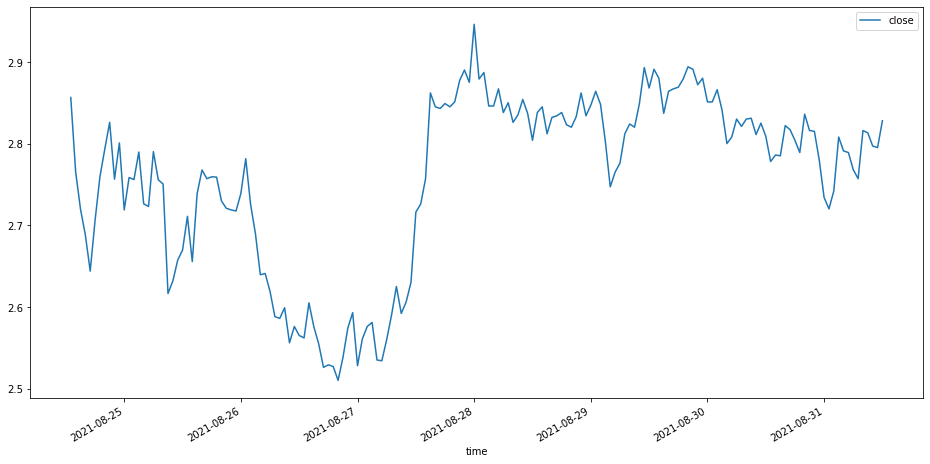

In [14]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 1, sharey=True)
dat.plot(kind='line', x='time', y='close', ax=axs, figsize=(16, 8))

Define training and validation dates

In [15]:
dat.time = dat.time.astype(str)
dat.index = dat.time
dat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 2021-08-24 12:59:59.999 to 2021-08-31 11:59:59.999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    168 non-null    object 
 1   close   168 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
train=dat.iloc[:p] 
valid=dat.iloc[p:]

In [17]:
train

,time,close
time,,
2021-08-24 12:59:59.999,2021-08-24 12:59:59.999,2.8564
2021-08-24 13:59:59.999,2021-08-24 13:59:59.999,2.7654
2021-08-24 14:59:59.999,2021-08-24 14:59:59.999,2.7197
2021-08-24 15:59:59.999,2021-08-24 15:59:59.999,2.6880
2021-08-24 16:59:59.999,2021-08-24 16:59:59.999,2.6438
...,...,...
2021-08-31 02:59:59.999,2021-08-31 02:59:59.999,2.8080
2021-08-31 03:59:59.999,2021-08-31 03:59:59.999,2.7910
2021-08-31 04:59:59.999,2021-08-31 04:59:59.999,2.7890


In [18]:
valid

,time,close
time,,
2021-08-31 07:59:59.999,2021-08-31 07:59:59.999,2.816
2021-08-31 08:59:59.999,2021-08-31 08:59:59.999,2.813
2021-08-31 09:59:59.999,2021-08-31 09:59:59.999,2.797
2021-08-31 10:59:59.999,2021-08-31 10:59:59.999,2.795
2021-08-31 11:59:59.999,2021-08-31 11:59:59.999,2.828


Graphics

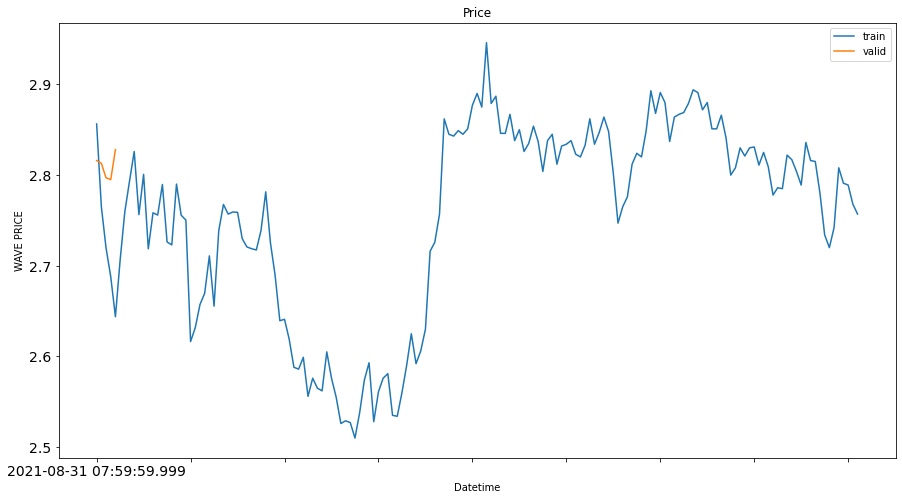

In [19]:
train['close'].plot(figsize=(15,8), title= 'Price', fontsize=14, label='train') 
valid['close'].plot(figsize=(15,8), title= 'Price', fontsize=14, label='valid') 
plt.xlabel("Datetime") 
plt.ylabel("WAVE PRICE") 
plt.legend(loc='best') 
plt.show()

Rename columns

In [20]:
import datetime
from datetime import datetime

train = train.rename(columns={'time': 'ds','close': 'y'})
train

,ds,y
time,,
2021-08-24 12:59:59.999,2021-08-24 12:59:59.999,2.8564
2021-08-24 13:59:59.999,2021-08-24 13:59:59.999,2.7654
2021-08-24 14:59:59.999,2021-08-24 14:59:59.999,2.7197
2021-08-24 15:59:59.999,2021-08-24 15:59:59.999,2.6880
2021-08-24 16:59:59.999,2021-08-24 16:59:59.999,2.6438
...,...,...
2021-08-31 02:59:59.999,2021-08-31 02:59:59.999,2.8080
2021-08-31 03:59:59.999,2021-08-31 03:59:59.999,2.7910
2021-08-31 04:59:59.999,2021-08-31 04:59:59.999,2.7890


In [21]:

valid = valid.rename(columns={'time': 'ds','close': 'y'})
valid

,ds,y
time,,
2021-08-31 07:59:59.999,2021-08-31 07:59:59.999,2.816
2021-08-31 08:59:59.999,2021-08-31 08:59:59.999,2.813
2021-08-31 09:59:59.999,2021-08-31 09:59:59.999,2.797
2021-08-31 10:59:59.999,2021-08-31 10:59:59.999,2.795
2021-08-31 11:59:59.999,2021-08-31 11:59:59.999,2.828


# FB Prophet approach

In [22]:
model = Prophet(growth='linear', seasonality_mode='multiplicative')
model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Make predictions

In [23]:
# Python
future = model.make_future_dataframe(periods=-p, freq=fr_ml)
future

,ds
0,2021-08-24 12:59:59.999
1,2021-08-24 13:59:59.999
2,2021-08-24 14:59:59.999
3,2021-08-24 15:59:59.999
4,2021-08-24 16:59:59.999
...,...
163,2021-08-31 07:59:59.999
164,2021-08-31 08:59:59.999
165,2021-08-31 09:59:59.999
166,2021-08-31 10:59:59.999


In [24]:
# Python
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(-p)

,ds,yhat,yhat_lower,yhat_upper
163,2021-08-31 07:59:59.999,2.744265,2.699888,2.789782
164,2021-08-31 08:59:59.999,2.735433,2.691153,2.782476
165,2021-08-31 09:59:59.999,2.728905,2.682813,2.775101
166,2021-08-31 10:59:59.999,2.731127,2.684854,2.776917
167,2021-08-31 11:59:59.999,2.742209,2.696227,2.790369


In [25]:
# calculating RMSE to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = mean_squared_error(valid.y, forecast.yhat.iloc[p:])
print(rms)

0.0054478384514604844


In [26]:
df_val=pd.DataFrame({'actual': valid.y, 'predicted': forecast.yhat.iloc[p:].values})
df_val

,actual,predicted
time,,
2021-08-31 07:59:59.999,2.816,2.744265
2021-08-31 08:59:59.999,2.813,2.735433
2021-08-31 09:59:59.999,2.797,2.728905
2021-08-31 10:59:59.999,2.795,2.731127
2021-08-31 11:59:59.999,2.828,2.742209


In [27]:
from datetime import datetime

train.ds.apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f").day)

time
2021-08-24 12:59:59.999    24
2021-08-24 13:59:59.999    24
2021-08-24 14:59:59.999    24
2021-08-24 15:59:59.999    24
2021-08-24 16:59:59.999    24
                           ..
2021-08-31 02:59:59.999    31
2021-08-31 03:59:59.999    31
2021-08-31 04:59:59.999    31
2021-08-31 05:59:59.999    31
2021-08-31 06:59:59.999    31
Name: ds, Length: 163, dtype: int64

Plot forecast

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


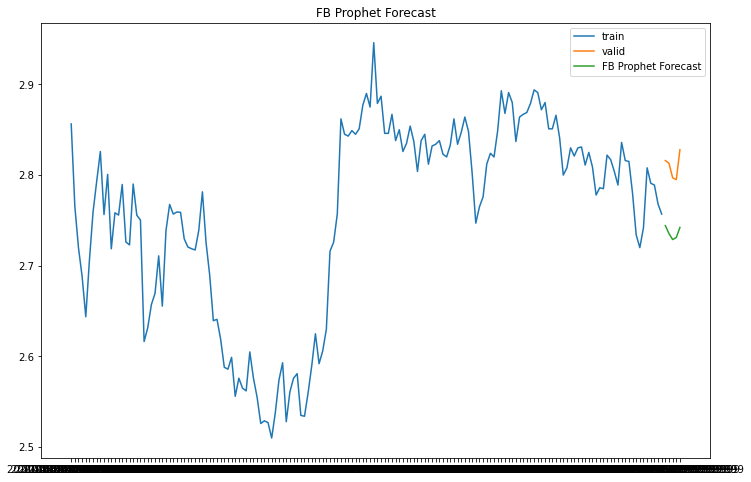

In [28]:
plt.figure(figsize=(12,8)) 
plt.plot(train.ds, train.y, label='train') 
plt.plot(valid.ds,valid.y, label='valid') 
plt.plot(forecast.yhat.iloc[p:], label='FB Prophet Forecast') 
plt.legend(loc='best') 
plt.title("FB Prophet Forecast") 
plt.show()

In [29]:
# Python
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [30]:
dat = dat.rename(columns={'time': 'ds','close': 'y'})

model2 = Prophet(growth='linear', seasonality_mode='multiplicative')
model2.fit(dat)

# Python
future2 = model2.make_future_dataframe(periods=-p, freq=fr_ml)
future2

# Python
forecast2 = model2.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(-p)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
168,2021-08-31 12:59:59.999,2.787811,2.741477,2.832363
169,2021-08-31 13:59:59.999,2.792803,2.745880,2.844902
170,2021-08-31 14:59:59.999,2.789481,2.743759,2.838976
171,2021-08-31 15:59:59.999,2.782694,2.734059,2.832241
172,2021-08-31 16:59:59.999,2.779722,2.730461,2.829571


In [31]:
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(-p)

,ds,yhat,yhat_lower,yhat_upper
168,2021-08-31 12:59:59.999,2.787811,2.741477,2.832363
169,2021-08-31 13:59:59.999,2.792803,2.745880,2.844902
170,2021-08-31 14:59:59.999,2.789481,2.743759,2.838976
171,2021-08-31 15:59:59.999,2.782694,2.734059,2.832241
172,2021-08-31 16:59:59.999,2.779722,2.730461,2.829571


# AUTO ARIMA approach

In [32]:
! pip install pmdarima

     |████████████████████████████████| 1.5 MB 4.0 MB/s 
     |████████████████████████████████| 9.5 MB 5.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm
import tensorflow as tf

In [34]:
from pmdarima import auto_arima

In [35]:
#train_data, test_data = dat[0:int(len(df)*0.7)], dat[int(len(df)*0.7):]

#training_data = train_data['y'].values
#test_data = test_data['y'].values

training_data = train['y'].values
test_data = valid['y'].values

In [36]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(training_data)

(0.6372111098327287, True)

In [37]:
from pmdarima.arima.utils import ndiffs

# Estimate the number of differences using an ADF test:
n_adf = ndiffs(training_data, test='adf')  # -> 0

# Or a KPSS test (auto_arima default):
n_kpss = ndiffs(training_data, test='kpss')  # -> 0

# Or a PP test:
n_pp = ndiffs(training_data, test='pp')  # -> 0
#assert n_adf == n_kpss == n_pp == 0

print(n_adf)
print(n_kpss)
print(n_pp)

1
1
1


In [38]:
pm.acf(training_data)

/usr/local/lib/python3.7/dist-packages/pmdarima/utils/wrapped.py:61: FutureWarning:

the 'unbiased'' keyword is deprecated, use 'adjusted' instead



array([ 1.        ,  0.94704815,  0.90628542,  0.8640571 ,  0.83243627,
        0.80979443,  0.7751473 ,  0.75222797,  0.72063993,  0.69614016,
        0.65251978,  0.60816617,  0.56765617,  0.52528291,  0.48632585,
        0.43831829,  0.42118595,  0.39842252,  0.37019533,  0.33909087,
        0.30138875,  0.27516611,  0.24590853,  0.20747356,  0.17444518,
        0.1462964 ,  0.11761843,  0.0905451 ,  0.06022524,  0.03591549,
        0.02539797,  0.00506639, -0.0140788 , -0.0270209 , -0.03267886,
       -0.04368531, -0.05284296, -0.06041208, -0.05756873, -0.05144792,
       -0.05097729])

/usr/local/lib/python3.7/dist-packages/pmdarima/utils/visualization.py:222: FutureWarning:

the 'unbiased'' keyword is deprecated, use 'adjusted' instead



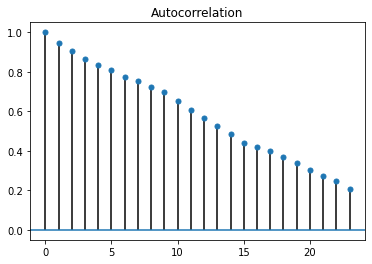

In [39]:
pm.plot_acf(training_data)

In [40]:
model=auto_arima(training_data, start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5, start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=12, seasonal=True, error_action='warn', trace= True, supress_warnings=True, stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-490.686, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-517.760, Time=0.48 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-547.530, Time=2.36 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-489.641, Time=0.41 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-545.563, Time=3.40 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=-545.556, Time=6.25 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-517.768, Time=1.27 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=-543.543, Time=7.03 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-548.878, Time=3.32 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=3.85 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=-546.906, Time=7.48 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-519.046, Time=0.92 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=-544.893, Time=5.29 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-547.565, Time=0.73 sec
 ARIMA(1,1,1)(0,1,1)[12]

In [41]:
#model.fit(training_data)

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  163
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                 276.439
Date:                              Tue, 31 Aug 2021   AIC                           -548.878
Time:                                      11:26:02   BIC                           -542.857
Sample:                                           0   HQIC                          -546.432
                                              - 163                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.8654      0.123     -7.032      0.000      -1.107      -0.624
sigma2         0.0013      0.000      7.518      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 5.27
Prob(Q):                              0.34   Prob(JB):                         0.07
Heteroskedasticity (H):               0.35   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
f=model.predict(n_periods=-p)

In [44]:
print(f)

[2.76684409 2.76198784 2.76288408 2.76673352 2.75503034]


In [45]:
z=pm.c(training_data,f)

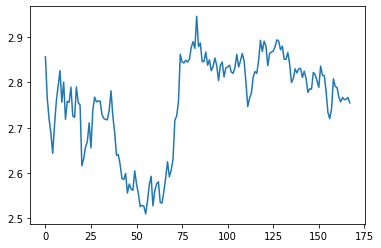

In [46]:
plt.plot(z)

In [47]:
#tf.keras.metrics.mean_absolute_error(training_data,f)

In [48]:
#tf.keras.metrics.mean_squared_error(training_data,f)

# MANUAL ARIMA approach

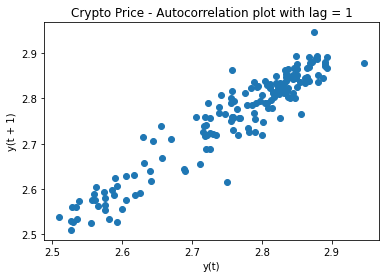

In [49]:
#import numpy as np 
#import pandas as pd 
#import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
#from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

plt.figure()
lag_plot(dat['y'], lag=1)
plt.title('Crypto Price - Autocorrelation plot with lag = 1')
plt.show()

In [50]:
#train_data, test_data = dat[0:int(len(df)*0.7)], dat[int(len(df)*0.7):]

#training_data = train_data['y'].values
#test_data = test_data['y'].values

history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)

for time_point in range(N_test_observations):
    #model = ARIMA(history, order=(4,1,0))
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)

MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 0.000985038707136946


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


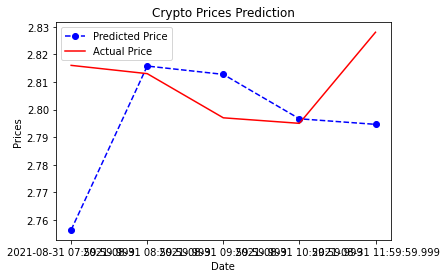

In [51]:
#test_set_range = dat[int(len(df)*0.7):].index
test_set_range = valid.index

plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')

plt.plot(test_set_range, test_data, color='red', label='Actual Price')

plt.title('Crypto Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
#plt.xticks(np.arange(881,1259,50), df.Date[881:1259:50])
plt.legend()
plt.show()

In [52]:
pred = [x[0] for x in model_predictions]

# Final dataframe with preds and methods

In [53]:
d1 = pd.DataFrame( {'auto_arima':f , 'manual_arima':pred})
d2 = forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(-p)

final_df = pd.concat([d2.reset_index(),d1], axis=1)

final_df

,index,ds,yhat,yhat_lower,yhat_upper,auto_arima,manual_arima
0,168,2021-08-31 12:59:59.999,2.787811,2.741477,2.832363,2.766844,2.756386
1,169,2021-08-31 13:59:59.999,2.792803,2.745880,2.844902,2.761988,2.815752
2,170,2021-08-31 14:59:59.999,2.789481,2.743759,2.838976,2.762884,2.812735
3,171,2021-08-31 15:59:59.999,2.782694,2.734059,2.832241,2.766734,2.796640
4,172,2021-08-31 16:59:59.999,2.779722,2.730461,2.829571,2.755030,2.794630
